# Handin exercise for week 5: Pandas

#### 1. What is the change in pct of divorced danes from 2008 to 2020?

In [1]:
%%bash
head ./textfiles/FOLK1A.csv

ALDER;CIVILSTAND;OMRÅDE;KØN;TID;INDHOLD
I alt;Fraskilt;Hele landet;I alt;2008K1;428864
I alt;Fraskilt;Hele landet;I alt;2020K4;552419
I alt;Ugift;Hele landet;I alt;2020K1;2844060
I alt;Ugift;Hele landet;I alt;2020K2;2851131
I alt;Ugift;Hele landet;I alt;2020K3;2854659
I alt;Ugift;Hele landet;I alt;2020K4;2859116
I alt;Ugift;Region Hovedstaden;I alt;2020K1;973802
I alt;Ugift;Region Hovedstaden;I alt;2020K2;976457
I alt;Ugift;Region Hovedstaden;I alt;2020K3;977487


In [33]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./textfiles/FOLK1A.csv', delimiter=';')
df1 = df[df['CIVILSTAND'].isin(['Fraskilt'])]
df1['PCT_CHANGE'] = df['INDHOLD'].pct_change()
df1


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ALDER,CIVILSTAND,OMRÅDE,KØN,TID,INDHOLD,PCT_CHANGE
0,I alt,Fraskilt,Hele landet,I alt,2008K1,428864,NaN
1,I alt,Fraskilt,Hele landet,I alt,2020K4,552419,0.288098


#### 2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?


In [4]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?valuePresentation=Value&delimiter=Semicolon&CIVILSTAND=TOT%2CU&Tid=2020K4&OMR%C3%85DE=084%2C085%2C082%2C083%2C081'
df = pd.read_csv(url, sep=';')
df = df.sort_values(by=['OMRÅDE'])
df

,CIVILSTAND,TID,OMRÅDE,INDHOLD
0,I alt,2020K4,Region Hovedstaden,1854296
5,Ugift,2020K4,Region Hovedstaden,981652
2,I alt,2020K4,Region Midtjylland,1330866
7,Ugift,2020K4,Region Midtjylland,657563
4,I alt,2020K4,Region Nordjylland,590739
9,Ugift,2020K4,Region Nordjylland,281410
1,I alt,2020K4,Region Sjælland,838129
6,Ugift,2020K4,Region Sjælland,369548
3,I alt,2020K4,Region Syddanmark,1223183
8,Ugift,2020K4,Region Syddanmark,568943


In [5]:
mask_ialt = df[df['CIVILSTAND'].isin(['I alt'])]
mask_ugift = df[df['CIVILSTAND'].isin(['Ugift'])]
print(mask_ialt)

  CIVILSTAND     TID              OMRÅDE  INDHOLD
0      I alt  2020K4  Region Hovedstaden  1854296
2      I alt  2020K4  Region Midtjylland  1330866
4      I alt  2020K4  Region Nordjylland   590739
1      I alt  2020K4     Region Sjælland   838129
3      I alt  2020K4   Region Syddanmark  1223183


In [6]:
print(mask_ugift)

  CIVILSTAND     TID              OMRÅDE  INDHOLD
5      Ugift  2020K4  Region Hovedstaden   981652
7      Ugift  2020K4  Region Midtjylland   657563
9      Ugift  2020K4  Region Nordjylland   281410
6      Ugift  2020K4     Region Sjælland   369548
8      Ugift  2020K4   Region Syddanmark   568943


In [7]:
total_list = list(mask_ialt.iloc[:,-1])
ugift_list = list(mask_ugift.iloc[:,-1])

for element in range(5):
    percent = ugift_list[element]/total_list[element]*100
    print(element, percent)

0 52.93933654605306
1 49.40865571740506
2 47.636942880019774
3 44.092019247633715
4 46.513318121654734


##### 3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now

In [100]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1&CIVILSTAND=U%2CG%2CE%2CF'
url_ugift = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1&CIVILSTAND=U'
url_gift = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1&CIVILSTAND=G'
url_enke = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1&CIVILSTAND=E'
url_fraskilt = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1&CIVILSTAND=F'
df = pd.read_csv(url, delimiter=';')
df1 = pd.read_csv(url_ugift, delimiter=';')
df2 = pd.read_csv(url_gift, delimiter=';')
df3 = pd.read_csv(url_enke, delimiter=';')
df4 = pd.read_csv(url_fraskilt, delimiter=';')
#df.plot.bar('CIVILSTAND', 'INDHOLD', figsize=(20,10))
#df.plot.bar('TID', 'INDHOLD', width=0.5, align='center', rot=45, figsize=(20,10))
#plt.bar(df['CIVILSTAND'], df['INDHOLD'], label='Ugift')

Text(0, 0.5, 'Antal mennesker')

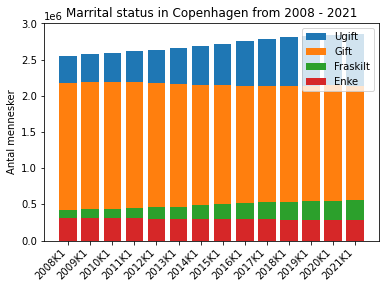

In [164]:
ugift_list = list(df1.iloc[:]['INDHOLD'])
gift_list = list(df2.iloc[:]['INDHOLD'])
enke_list = list(df3.iloc[:]['INDHOLD'])
fraskilt_list = list(df4.iloc[:]['INDHOLD'])
år = []
for element in df1['TID']:
    år.append(element)

plt.bar(år, ugift_list, label='Ugift')
plt.bar(år, gift_list, label='Gift')
plt.bar(år, fraskilt_list, label='Fraskilt')
plt.bar(år, enke_list, label='Enke')
plt.legend(loc=1)
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
plt.title('Marrital status in Copenhagen from 2008 - 2021', fontsize=12)
plt.ylabel("Antal mennesker", fontsize=10)
#plt.axis([0, 14, 0, max(ugift_list) + 1250000])

In [165]:
#df.plot.bar('CIVILSTAND', 'INDHOLD', figsize=(20,10))
#df.plot.bar('TID', 'INDHOLD', width=0.5, align='center', rot=45, figsize=(20,10))

#### Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020
##### (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs

In [55]:
url_gift = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=G&ALDER=*&Tid=2020K4'
url_ugift = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U&ALDER=*&Tid=2020K4'

df_gift = pd.read_csv(url_gift, sep=';')
df_ugift = pd.read_csv(url_ugift, sep=';')

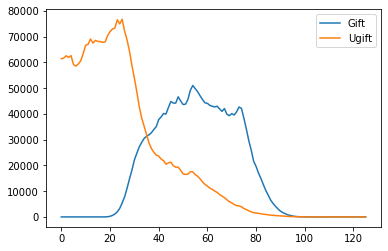

In [71]:
gift_list = list(df_gift.iloc[1:]['INDHOLD'])
ugift_list = list(df_ugift.iloc[1:]['INDHOLD'])
alder = []
for element in range(126):
    alder.append(element)

plt.plot(alder, gift_list, label='Gift')
plt.plot(alder, ugift_list, label='Ugift')
plt.legend()